<h2 align="center">Image Compression with K-means Clustering</h2>

<h4 align="center">- Chirag Sable</h4>

<br>

In this project, we will apply the k-means clustering unsupervised learning algorithm using scikit-learn and Python to build an image compression application with interactive controls. 

Here, we will also learn about pre-processing high-resolution image data for k-means clustering, conducting basic exploratory data analysis (EDA) and data visualization, applying a computationally time-efficient implementation of the k-means algorithm, Mini-Batch K-Means, to compress images, and leverage the Jupyter widgets library to build interactive GUI components to select images from a drop-down list and pick values of k using a slider.


## Project Outline

<a href='#task1'>1. Importing Libraries</a><br>
<a href='#task2'>2. Data Preprocessing</a><br>
<a href='#task3'>3. Visualizing the Color Space using Point Clouds</a><br>
<a href='#task4'>4. Visualizing the K-Means Reduced Color Space</a><br>
<a href='#task5'>5. K-means Image Compression with Interactive Controls</a><br>


<a id='task1'></a>
## 1. Importing Libraries
---

Here, the required libraries will be imported

In [2]:
from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")

!pip install scikit-image #to install the scikit-image package
from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [3]:
plt.rcParams['figure.figsize'] = (20, 12)

<a id='task2'></a>
## 2. Data Preprocessing 
---

Since it's an image we have to read it using `io.read`. After that, let's visualize our imported image.

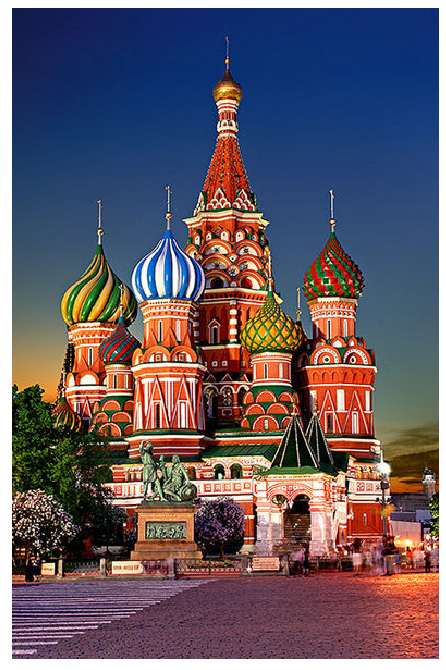

In [4]:
img = io.imread('Data/1-Saint-Basils-Cathedral.jpg')
ax = plt.axes(xticks=[], yticks=[]) #we don't want the axis
ax.imshow(img); #semicolon- reference to the matplotlib object will not be printed

In [5]:
img.shape #height, width, depth(as it is a color image) A stack of 3 grids with 600x394

(600, 394, 3)

Above result implies height, width, depth(as it is a color image) i.e A stack of 3 grids with 600x394

Let us reshape this into 3 long vectors of RGB. But before that, we need to normalize and bring into range of 0-1

In [6]:
img_data = (img / 255.0).reshape(-1, 3) #to reshape into 3 long vectors RGB. /255 because we are notrmalizing it into range of 0-1
img_data.shape

(236400, 3)

-1 in reshape function is used when you don't know or want to explicitly tell the dimension of that axis. To be more precise numpy will determine it.

<a id='task3'></a>
## 3. Visualizing the Color Space using Point Clouds
---

In [7]:
from plot_utils import plot_utils

In [8]:
# %load plot_utils.py
import numpy as np
import matplotlib.pyplot as plt

class plot_utils:
    def __init__(self, img_data, title, num_pixels=10000, colors=None):
        self.img_data = img_data
        self.title = title
        self.num_pixels = num_pixels
        self.colors = colors

    def colorSpace(self):
        if self.colors is None:
            self.colors = self.img_data

        rand = np.random.RandomState(42)
        index = rand.permutation(self.img_data.shape[0])[:self.num_pixels]
        colors = self.colors[index]
        R, G, B = self.img_data[index].T
        fig, ax = plt.subplots(1, 2, figsize=(12,8))
        ax[0].scatter(R, G, color=colors, marker='.')
        ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
        ax[1].scatter(R, B, color=colors, marker='.')
        ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
        fig.suptitle(self.title, size=20)


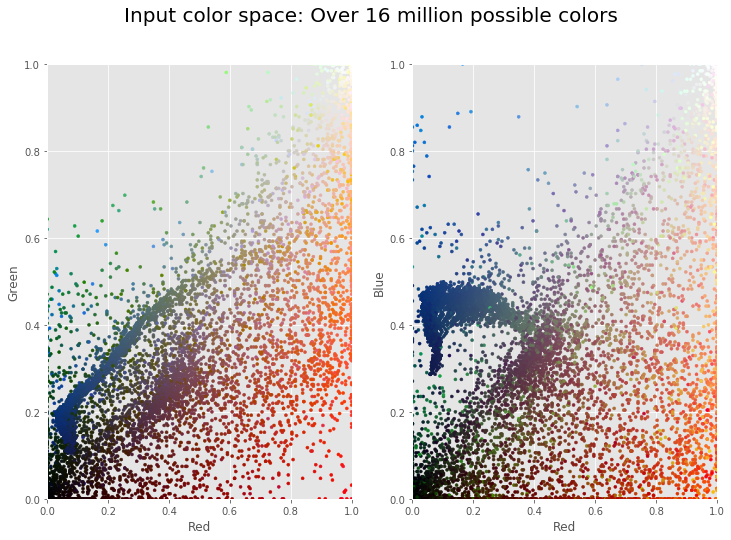

In [9]:
x = plot_utils(img_data, title='Input color space: Over 16 million possible colors')
x.colorSpace()

As we can see, we cannot see the change of one color to another; it's smooth.

<a id='task4'></a>
## 4. Visualizing the K-means Reduced Color Space
---

<a title="Incheol [CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Kmeans_animation.gif"><img width="300"  alt="Kmeans animation" src="https://upload.wikimedia.org/wikipedia/commons/d/d5/Kmeans_animation.gif"></a>
<h5 align="left">Incheol [<a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>], <a href="https://commons.wikimedia.org/wiki/File:Kmeans_animation.gif">via Wikimedia Commons</a></h5>

<br>

**K-means Algorithm**:

1. Initialization: Randomly sample $k$ colors from the input image. These are the initial $k$ means $\mu_1,\mu_2,...,\mu_k$.


2. For each pixel in the image, assign it to its nearest mean given by $$c^{(i)} := \textrm{argmin}_{j}\left \|x^{(i)} - \mu_j \right \|^2$$


3. Update the means using the pixel assignments from Step 2. $$\mu_j := \frac{\sum_{i}^{n}1\left \{c^{(i)} = j  \right \}x^{(i)}}{\sum_{i}^{n}1\left \{c^{(i)} = j  \right \}}$$


4. Repeat Steps 2 and 3 until convergence.

<br>

To efficiently process high resolution images in small batches, we are using a helper function called `MiniBatchKMeans`

In [10]:
from sklearn.cluster import MiniBatchKMeans

After fitting, re-color each point in original image with the latest cluster assignments that k-means converts to. We are predicting the colors on the `img_data` i.e original pixel value & we are looking at the cluster assignments of those and re-coloring our original image.

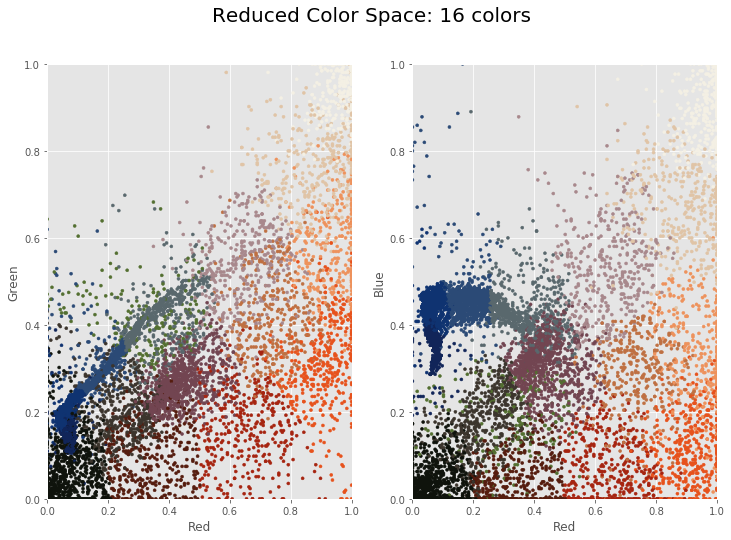

In [11]:
kmeans = MiniBatchKMeans(16).fit(img_data) #k=16

k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]

#let's visualize this kMeans reduced colorspace
y = plot_utils(img_data, colors=k_colors, title='Reduced Color Space: 16 colors')
y.colorSpace()

Here, we are able to differentiate the color change more readily than the original one.

<a id='task5'></a>
## 5. K-means Image Compression with Interactive Controls
---

**KMeans Clustering Algorithm** is an unsupervised Machine Learning algorithm. It can be used to separate unlabelled data like the image colors into distinct groups. So for eg. a marketing team could use kmeans on customer data to perform customer segmentation. However, for this project we used kmeans clustering to perform image compression. So, what we did, is, group pixels in an image by their similaity in color in order to reduce the total number of colors within that image.

Jupyter Notebooks allows us to use **Ipython widgets** which has a decorator called **Interact**, that allows us to automatically give drop downs and sliders for the value of k and also the image we want to compress.

In [14]:
img_dir = 'Data/'

In [15]:
@interact
def color_compression(image=os.listdir(img_dir), k=IntSlider(min=1, max=256, step=1, value=16,
                                                            continuous_update=False,
                                                            layout=dict(width='100%'))): 
    
#argument1-> list images in a particular directory which creates a dropdown
#continuous_update -> update the function as I'm moving along the slider

    input_img = io.imread(img_dir+image)
    img_data = (input_img / 255.0).reshape(-1, 3)
    
    kmeans = MiniBatchKMeans(k).fit(img_data)
    k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]
    
    #Recolor our images and reshape it
    k_img = np.reshape(k_colors, (input_img.shape))
    
    #plot the compressed image and original image side by side
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.suptitle('K-Means Image Compression', fontsize=20)
    
    ax1.set_title('Compressed')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)
    
    ax2.set_title('Original (16,777,216 colors)')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(input_img)
    
    #to avoid overalpping of title offset them
    plt.subplots_adjust(top=0.85)
    plt.show()
    
    

interactive(children=(Dropdown(description='image', options=('1-Saint-Basils-Cathedral.jpg', '2-new-york-skyli…

So, we have compressed our original image and we can easily see the difference between the two.